In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [21]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [24]:
# reflect an existing database into a new model
new_database = automap_base()
# reflect the tables
new_database.prepare(engine, reflect=True)

In [25]:
# View all of the classes that automap found
new_database.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
Measurement = new_database.classes.measurement
Station = new_database.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x27e42f312b0>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

In [31]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x27e3f776d60>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

In [32]:
#Most recent date
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'The most recent date is: {recent_date[0]}')

The most recent date is: 2017-08-23


In [33]:
# Calculate the date one year from the last date in data set.
dates = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [35]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, func.avg(Measurement.prcp)).\
            filter(Measurement.date.between (dates, dt.date(2017, 8, 23))).group_by('date')

for value in results:
    print(value)

('2016-08-23', 0.45166666666666666)
('2016-08-24', 1.5549999999999997)
('2016-08-25', 0.07714285714285715)
('2016-08-26', 0.016666666666666666)
('2016-08-27', 0.06399999999999999)
('2016-08-28', 0.5166666666666666)
('2016-08-29', 0.24333333333333332)
('2016-08-30', 0.011666666666666667)
('2016-08-31', 0.6359999999999999)
('2016-09-01', 0.006)
('2016-09-02', 0.05)
('2016-09-03', 0.254)
('2016-09-04', 0.276)
('2016-09-05', 0.08499999999999999)
('2016-09-06', 0.246)
('2016-09-07', 0.3333333333333333)
('2016-09-08', 0.07666666666666667)
('2016-09-09', 0.17833333333333332)
('2016-09-10', 0.27999999999999997)
('2016-09-11', 0.25)
('2016-09-12', 0.308)
('2016-09-13', 0.45166666666666666)
('2016-09-14', 2.3800000000000003)
('2016-09-15', 0.8266666666666667)
('2016-09-16', 0.11714285714285715)
('2016-09-17', 0.13599999999999998)
('2016-09-18', 0.10600000000000001)
('2016-09-19', 0.064)
('2016-09-20', 0.14714285714285716)
('2016-09-21', 0.19499999999999998)
('2016-09-22', 0.2057142857142857)
('2

In [38]:
# Save the query results as a Pandas DataFrame and set the index to the date column
new_df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
# Sort the dataframe by date
new_df.set_index('Date', inplace=True)

new_df.sort_values(by='Date')
new_df

,Precipitation
Date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


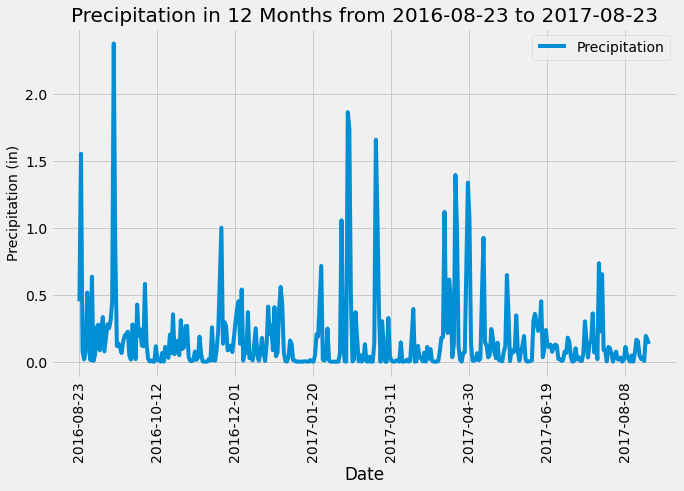

In [40]:
# Use Pandas Plotting with Matplotlib to plot the data
new_df.plot(figsize= (10,6), rot = 90);
plt.ylabel(f'Precipitation (in)', size=14)
plt.title(f'Precipitation in 12 Months from 2016-08-23 to 2017-08-23', size=20)
plt.savefig("Images/my_precipitation.png");
plt.show();

In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data
round(new_df.describe(),3)

,Precipitation
count,366.000
mean,0.171
std,0.296
min,0.000
25%,0.009
50%,0.070
75%,0.192
max,2.380


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number stations in the dataset
total_number_stations  = session.query(Station.station.distinct()).filter(Station.station.isnot(None)).count()
total_number_stations
print(f'The total number of stations in the data set is: {total_number_stations}')

The total number of stations in the data set is: 9


In [45]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station.label("Station"), Station.name.label("Name"), func.count(Measurement.station).label("Count"))\
                .join(Station, Station.station == Measurement.station).order_by(func.count(Measurement.station).desc())\
                .filter(Measurement.station.isnot(None))\
                .group_by(Measurement.station, Station.name)

for station in active_stations:
    print(station)

('USC00519281', 'WAIHEE 837.5, HI US', 2772)
('USC00519397', 'WAIKIKI 717.2, HI US', 2724)
('USC00513117', 'KANEOHE 838.1, HI US', 2709)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979)
('USC00517948', 'PEARL CITY, HI US', 1372)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)


In [46]:
print(f'The most active stations is: {active_stations[0][0]} {active_stations[0][1]}')
print(f'with: {active_stations[0][2]} rows')

The most active stations is: USC00519281 WAIHEE 837.5, HI US
with: 2772 rows


In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
AVG_most_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
                          .filter(Measurement.station == active_stations[0][0]).all()
AVG_most_active_station

print(f'Stations:{active_stations[0][0]}')
print(f'Lowest temperature: {AVG_most_active_station[0][0]}') 
print(f'Highest temperature: {AVG_most_active_station[0][1]}')
print(f'Average temperature: {round(AVG_most_active_station[0][2],2)}')

Stations:USC00519281
Lowest temperature: 54.0
Highest temperature: 85.0
Average temperature: 71.66


In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obser_12 = session.query(Measurement.date, Measurement.tobs)\
                .filter(Measurement.station == active_stations[0][0], Measurement.date.between(dates, dt.date(2017, 8, 23)))\
                .group_by(Measurement.date)\
                .order_by(Measurement.date)

for station in temp_obser_12:
    print(station)    

('2016-08-23', 77.0)
('2016-08-24', 77.0)
('2016-08-25', 80.0)
('2016-08-26', 80.0)
('2016-08-27', 75.0)
('2016-08-28', 73.0)
('2016-08-29', 78.0)
('2016-08-30', 77.0)
('2016-08-31', 78.0)
('2016-09-01', 80.0)
('2016-09-02', 80.0)
('2016-09-03', 78.0)
('2016-09-04', 78.0)
('2016-09-05', 78.0)
('2016-09-06', 73.0)
('2016-09-07', 74.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 77.0)
('2016-09-11', 80.0)
('2016-09-12', 76.0)
('2016-09-13', 79.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 78.0)
('2016-09-17', 79.0)
('2016-09-18', 78.0)
('2016-09-19', 78.0)
('2016-09-20', 76.0)
('2016-09-21', 74.0)
('2016-09-22', 77.0)
('2016-09-23', 78.0)
('2016-09-24', 79.0)
('2016-09-25', 79.0)
('2016-09-26', 77.0)
('2016-09-27', 80.0)
('2016-09-28', 78.0)
('2016-09-29', 78.0)
('2016-09-30', 78.0)
('2016-10-01', 77.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04', 79.0)
('2016-10-05', 79.0)
('2016-10-06', 75.0)
('2016-10-07', 76.0)
('2016-10-08', 73.0)
('2016-10-09'

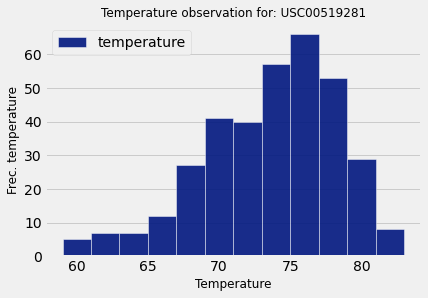

In [49]:
#histograms: 
temp_obser_df = pd.DataFrame(temp_obser_12, columns=['Date', 'Temp'])
temp_obser_df.set_index('Date', inplace=True)
plt.xlabel('Temperature', fontsize='12')
plt.ylabel('Frec. temperature', fontsize='12')
plt.title(f'Temperature observation for: {active_stations[0][0]}', fontsize='12')
plt.hist(temp_obser_df, bins=12, alpha=.9, color='#00177f', label='temperature', edgecolor='w')
plt.grid(axis='x', alpha=.4)
plt.legend();
plt.savefig("Images/station-histogram_USC00519281.png");

# Close session

In [ ]:
# Close Session
session.close()